# Dataset Preprocessing and Loading

This notebook demonstrates how to extract the default dataset given using functions in `dataset.py`

In [1]:
%load_ext autoreload
%autoreload 2

from descriptor import *
from dataset import *
from template import *
from matplotlib import pyplot as plt
import os
import cv2
import pickle

## Extract Annotations

Annotations include metadata on the dataset, such as the bounding boxes of ground truths, pose and classification status
<br>**provided_annots** are annnotation given by TA</br>
<br>**extra_annots** are additional annotations we added</br>

In [2]:
curr_wd = os.getcwd()
annot_source_path = os.path.join(curr_wd, 'cache_anno', 'classification')
annot_source_path_provided = os.path.join(annot_source_path, 'provided_annots.pkl')
annot_source_path_extra = os.path.join(annot_source_path, 'extra_annots.pkl')

# Extract Annotations if file does not exist
# NOTE: Delete existing .pkl files before running is recommended
extract_provided_annots()
extract_extra_annots()

In [3]:
# Load annotations
with open(annot_source_path_provided, 'rb') as f:
    provided_annots = pickle.load(f)

with open(annot_source_path_extra, 'rb') as f:
    extra_annots = pickle.load(f)
    
# extra_annots # Display format

## Extract Window Patches

We extract each bounding box of Waldo as a window, for which we can extract features from using interest point descriptors

In [4]:
# Extract windows for both train and validation
patch_source_path = os.path.join(curr_wd, 'datasets', 'classification')

# load all annotated patches
# here we just load random patches from all images for negative examples
img_lst = []
img_lst_pth = os.path.join(curr_wd, 'datasets', 'ImageSets', 'images.txt')
with open(img_lst_pth, 'r') as fp:
    contents = fp.readlines()
    for l in contents:
        file_name = l.strip()
        if file_name:
            img_lst.append(file_name)

prepare_classification_dataset(img_lst)

## Loading Dataset

In [9]:
import matplotlib.pyplot as plt
def check_loader(loader, title):
    fig, axes = plt.subplots(nrows=1, ncols=8)
    fig.suptitle(title, y=0.35)
    fig.set_size_inches(18.5, 10.5)
    for i in range(8):
        axes[i].axis('off')
        im, gt = next(loader)
        if im.ndim == 3:
            im = im[:, :, ::-1] 
        axes[i].imshow(im)
        axes[i].set_title(gt)

---num of training instances: 802
---num of validation instances: 200


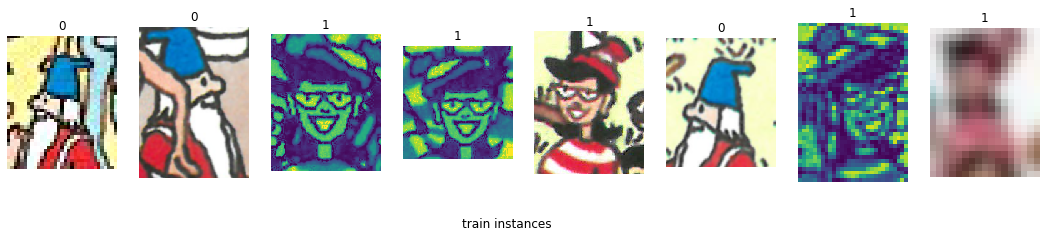

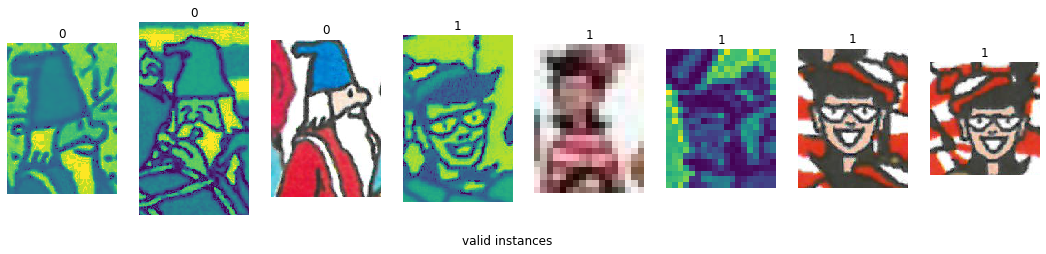

In [11]:
# create dataloader for the simplest waldo binary classification
# 'simple' means we only use random patches as example
# we only use 80 percent of these negative examples
pos_cls = ['wenda_face_front']
neg_cls = ['wizard_face_front']
train_loader, valid_loader = prepare_classification_dataloader(pos_classes=pos_cls, neg_classes=neg_cls, simple=False, neg_ratio=1.0)
check_loader(train_loader, 'train instances')
check_loader(valid_loader, 'valid instances')

In [13]:
# test wenda dataset
from classification import *
cls_types = ['wenda_face_front']
sift_classifier = Classifier('sift', pos_classes=cls_types, neg_ratio=0.5)
sift_classifier.train()

---num of training instances: 3452
---num of validation instances: 862
--- fetching the vocbulary for sift
--- extracting features from the training set
--- extracting features from the positive validation set
--- predicting the validation set labels
--- precision: 0.979, recall: 0.868, f1-score: 0.920


### Python Module

On first loading the project directory, please run the below function to preprocess and load the necessary data. If a fresh preprocessing is required, set the `clean` parameter to `True`. If the below code block has issues, run the above code blocks in sequence.

In [ ]:
prepare_dataset(clean=False)
# NOTE: If cache anno has a default file, either remove it then run this function, or set clean to be true